In [219]:
import scipy.stats as stats
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt


In [220]:
cars_df = pd.read_csv('data/cars.csv')
cars_df = cars_df[cars_df['horsepower'] != '?']
cars_df.sample(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
320,37.0,4,119.0,92.00,2434.0,15.0,80,3,datsun 510 hatchback
166,13.0,8,302.0,129.0,3169.0,12.0,75,1,ford mustang ii
214,13.0,8,302.0,130.0,3870.0,15.0,76,1,ford f108
133,16.0,6,250.0,100.0,3781.0,17.0,74,1,chevrolet chevelle malibu classic
153,18.0,6,250.0,105.0,3459.0,16.0,75,1,chevrolet nova
87,13.0,8,350.0,145.0,3988.0,13.0,73,1,chevrolet malibu
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda rx-7 gs
150,26.0,4,108.0,93.00,2391.0,15.5,74,3,subaru
33,19.0,6,232.0,100.0,2634.0,13.0,71,1,amc gremlin
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


- Columns: MPG, Cylinders, Displacement, Weight, Acceleration, Model, Origin, Car Name
- 398 samples, no missing data, all data was numeric except Car Name
- 6 rows had '?' as the value for horsepower, those rows were removed

- Interested in difference in MPG or US-made and Japanese-made 4-cylinder vehicles

- Null Hypothesis: Japanese made cars have equal or less than MPG than US cars for 4-cylinder vehicles
- Alt Hypothesis: MPG is greater in Japanese made 4-cylinder cars

In [221]:

# creating new df with only American and Japanese manufactured vehicles that are 4-cylinders

cars_df = cars_df[(cars_df['origin'] != 2) & (cars_df['cylinders'] == 4)]

cars_df.groupby(cars_df['origin']).mean()

,mpg,cylinders,displacement,weight,acceleration,model
origin,,,,,,
1,28.013043,4.0,124.050725,2427.391304,16.465217,78.043478
3,31.595652,4.0,99.768116,2153.492754,16.569565,77.507246


In [230]:
def sample_calcs(col1, col2='origin'):
    
    col1_df = pd.DataFrame()
    col1_df['Mean'] = cars_df.groupby(col2)[col1].mean()
    col1_df['STD'] = cars_df.groupby(col2)[col1].std()
    col1_df['Sample Size'] = cars_df.groupby(col2)[col1].count()

    return col1_df


comparison_df = sample_calcs('mpg')
comparison_df


,Mean,STD,Sample Size
origin,,,
1,28.013043,4.566596,69
3,31.595652,5.435787,69


In [223]:
def samp_dist_info(mean, std, sample_size, color):

    std_error = std / np.sqrt(sample_size)
    sample_dist_mean = stats.norm(mean, std_error)
    xs = np.linspace(mean-(4*std_error), mean+(4*std_error), 251)

    pdfs = sample_dist_mean.pdf(xs)

    return sample_dist_mean, std_error, xs

In [224]:

def graph_samp_dist(mean, std, sample_size, color):

    std_error = std / np.sqrt(sample_size)
    sample_dist_mean = stats.norm(mean, std_error)  
    xs = np.linspace(mean-(4*std_error), mean+(4*std_error), 501)

    pdfs = sample_dist_mean.pdf(xs)

    ax.plot(xs, pdfs, color=color)

In [225]:
def graph_cv_shade_alpha(dist, alpha):

    ax.axvline(dist.ppf(alpha), linestyle='--', color='grey')
    alpha_shade = xs[xs >= null_sample_dist.ppf(alpha)]
    ax.fill_between(alpha_shade, 0, null_sample_dist.pdf(alpha_shade))

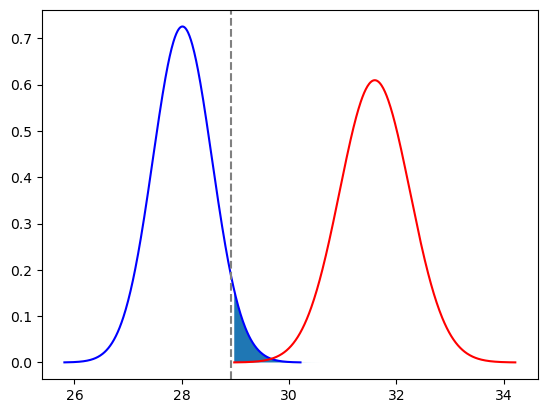

In [226]:
fig, ax = plt.subplots()

comparison_df = sample_calcs('mpg')

null_sample_dist, null_std_error, xs = samp_dist_info(comparison_df['Mean'][1], comparison_df['STD'][1], comparison_df['Sample Size'][1], 'r')
alt_sample_dist, alt_std_error, xs = samp_dist_info(comparison_df['Mean'][3], comparison_df['STD'][3], comparison_df['Sample Size'][3], 'r')

graph_samp_dist(comparison_df['Mean'][1], comparison_df['STD'][1], comparison_df['Sample Size'][1], 'b')
graph_samp_dist(comparison_df['Mean'][3], comparison_df['STD'][3], comparison_df['Sample Size'][3], 'r')

graph_cv_shade_alpha(null_sample_dist, 0.95)

(array([ 2.,  1.,  2.,  6.,  2.,  5.,  3.,  3.,  8., 13.,  6.,  2.,  7.,
         4.,  2.,  1.,  0.,  0.,  1.,  1.]),
 array([20.  , 21.33, 22.66, 23.99, 25.32, 26.65, 27.98, 29.31, 30.64,
        31.97, 33.3 , 34.63, 35.96, 37.29, 38.62, 39.95, 41.28, 42.61,
        43.94, 45.27, 46.6 ]),
 <BarContainer object of 20 artists>)

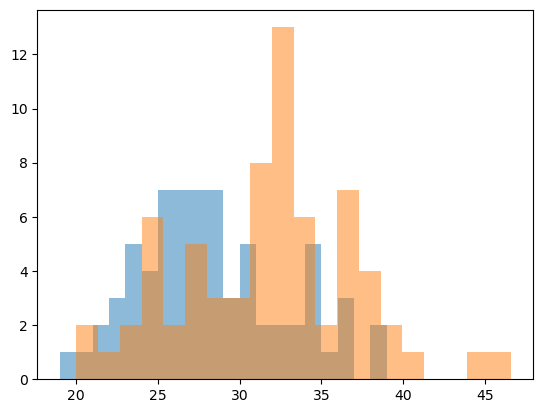

In [227]:
plt.hist(cars_df[cars_df['origin'] == 1]['mpg'], alpha=0.5, bins=20)
plt.hist(cars_df[cars_df['origin'] == 3]['mpg'], alpha=0.5, bins=20)

In [228]:
a = cars_df[cars_df['origin'] == 1]['mpg']
b = cars_df[cars_df['origin'] == 3]['mpg']
test_df = pd.DataFrame()
test_df['a'] = a.values
test_df['b'] = b.values

t, p = stats.ttest_ind(test_df['b'], test_df['a'], equal_var=False, alternative='greater')
print(t, p)


4.191812768095905 2.5172894336033587e-05


- We are able to reject our null hypothesis that US made and Japanese made 4 cylinder cars
have the same value for MPG. With a significance level of 0.05, Japanese made cars had
a p-value of 2.52 * 10^-5. 